In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 3
setup_one_gpu(GPU)

Picking GPU 3


In [2]:
import numpy as np
import os.path as osp
import tensorflow as tf

from general_tools.notebook.tf import reset_tf_graph
from general_tools.in_out import create_dir

from geo_tool import Point_Cloud

from tf_lab.point_clouds.autoencoder import Configuration as Conf
from tf_lab.point_clouds.point_net_ae import PointNetAutoEncoder

from tf_lab.point_clouds.convenience import reconstruct_pclouds

from tf_lab.data_sets.shape_net import snc_category_to_synth_id
from tf_lab.iclr.helper import load_multiple_version_of_pcs, find_best_validation_epoch_from_train_stats

from pc_completions.helper import load_pretrained_ae_from_iclr

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
top_data_dir = '/orions4-zfs/projects/optas/DATA/'
experiment_tag =  'mlp_with_split_1pc_usampled_bnorm_on_encoder_only'
n_pc_points = 4096
random_seed = 42
bneck = 128
loss = 'emd'
class_name = 'chair'
syn_id = snc_category_to_synth_id()[class_name]

In [7]:
in_data = load_multiple_version_of_pcs('uniform_one', syn_id, n_classes=1, n_pc_points=n_pc_points)

679 pclouds were loaded. They belong in 1 shape-classes.
5761 pclouds were loaded. They belong in 1 shape-classes.
338 pclouds were loaded. They belong in 1 shape-classes.


In [6]:
ae = load_pretrained_ae_from_iclr(class_name, loss, bneck=bneck, n_pc_points=n_pc_points)

INFO:tensorflow:Restoring parameters from /orions4-zfs/projects/optas/DATA/OUT/iclr/nn_models/ae_chair_mlp_with_split_1pc_usampled_bnorm_on_encoder_only_4096_pts_128_bneck_emd/models.ckpt-450
Model restored in epoch 450.


In [8]:
reconstr_val, loss_val = reconstruct_pclouds(ae, in_data['val'].point_clouds, batch_size=50)

In [9]:
loss_val / 4096

0.04519546481631917

15


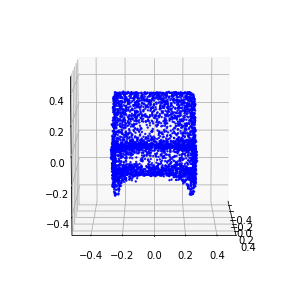

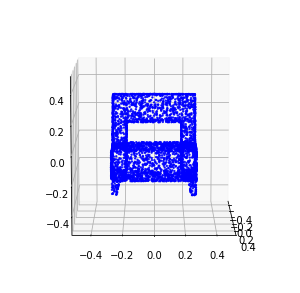

In [13]:
rid = np.random.randint(len(reconstr_val))
print rid
Point_Cloud(reconstr_val[rid]).plot(azim=0);
Point_Cloud(in_data['val'].point_clouds[rid]).plot(azim=0);